# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## 1. Is the distribution of body temperatures normal?

Comparing the distribution plot of the temperature points with the normal curve.

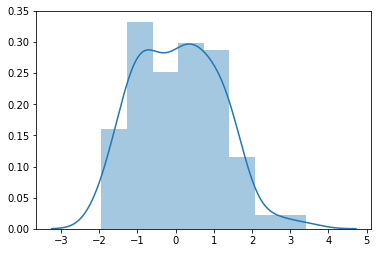

In [3]:
import seaborn as sns
import numpy as np
%matplotlib inline

normal_dist = np.random.normal(size=130)
sns.distplot(normal_dist)

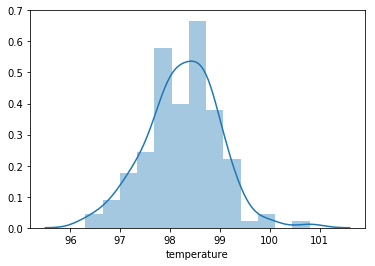

In [4]:
temp_dist = df['temperature'].sort_values()
sns.distplot(temp_dist)

### The temperature curve looks like the normal curve. 

## 2. Is the sample size large? Are the observations independent?

In [5]:
num_obs=len(df['temperature'])
print(num_obs)

130


Since n>30, the sample size is large enough. 
Yes the observations are independendent because each observation is for a unique individual, and the observations from one individual do not impact the observations for another person in the data.

## 3. Is the true population mean really 98.6 degrees F?

In [6]:
sample_mean = temp_dist.mean()
sample_std = temp_dist.std()
print(sample_mean)
print(sample_std)

98.24923076923076
0.7331831580389453


No. The true mean is not 98.6 F.

#### Would you use a one-sample or two-sample test? Why?

A one sample test will be utilized. We are looking at the mean for the entire population and not for any subgroups. If we were asking questions about two groups within our population, then a two-sample test would be appropriate.
In this situation, is it appropriate to use the t or z statistic?

#### In this situation, is it appropriate to use the  tt  or  zz  statistic?
It is appropriate to use a z-test because the sample size is large ( n > 30 ) and the standard deviation is known.
A t-test would be appropriate if the sample size is small ( n < 30 ) and the standard deviation was unknown.

To proceed, we create a null hypothesis to test.

Ho: The true mean of the population temperature is 98.6 F

In [7]:
hyp_mean = 98.6
se = (sample_std / np.sqrt(count_temp))

z_stat = (sample_mean - hyp_mean) / se
print(f'      H0 Mean: {hyp_mean}')
print(f'Observed Mean: {sample_mean}')
print(f' Observed Std: {sample_std}')
print(f'   Observed n: {num_obs}')
print(f'       z-stat: {z_stat}')

      H0 Mean: 98.6
Observed Mean: 98.24923076923076
 Observed Std: 0.7331831580389453
   Observed n: 130
       z-stat: -5.454823292364301


The resulting z-stat is approximate -5.48 standard deviations below the mean of the null hypothesis 98.6 degrees F. The next step is to calculate a p-statistic to identify the probability that the true mean is within 5.48 units of standard deviation of 98.25 F.

In [8]:
import scipy.stats as stats
p_value = stats.norm.sf(abs(z_stat))*2 #twosided
print(f'p-value: {p_value}\n')

p-value: 4.9021570141072446e-08



The calculated p-value is less than 0.05. As a result, we reject the null hypothesis.
This means the true mean is not 98.6°F.

#### Now try using the other test. How is the result be different? Why?
Using a t-test yields the following, given the low value of p, we can assume that the z statistic and t statistic are approximately equal.

In [9]:
# T- test
t_stat = z_stat
print(f't-statistic: {t_stat}')

p_value = stats.t.sf(np.abs(t_stat), len(df)-1) * 2
print(f'p-value: {p_value}')

t-statistic: -5.454823292364301
p-value: 2.4106320415585427e-07


The resulting p-value is different from the value calculated from the z-statistic. However, it is still small enough that we can reject the null hypothesis, and say the true mean temperature is not 98.6 F.

## 4. Draw a small sample of size 10 from the data and repeat both tests.

#### Which one is the correct one to use?
With such a small sample size ( n < 30 ) a t-test is the appropriate choice.

#### What do you notice? What does this tell you about the difference in application of the t and z statistic?

In [15]:
sample = np.random.choice(df['temperature'], size=10)

# Calculate Z Statistic and Associated p-value
z_stat2 = ( np.mean(sample) - hyp_mean ) / ( np.std(sample) / np.sqrt(len(sample)) )
p_value2 = stats.norm.sf(abs(z_stat2))*2
print(f'      z-stat: {z_stat2}')
print(f'     p-value: {p_value2}')

      z-stat: -2.25423065243525
     p-value: 0.02418166139041259


In [16]:
# t and z are assumed to be approximately equal due to low p-value
# Calculate t-statistic and resulting p-value
t_stat2 = z_stat2
print(f' t-statistic: {t_stat2}')

p_t = stats.t.sf(np.abs(t_stat2), len(df)-1) * 2
print(f'p-value: {p_t}')

 t-statistic: -2.25423065243525
p-value: 0.02586823599377087


The use of the smaller sample size results in larger p-values, with even some derived samples providing p-results that do not reject the null hypothesis. It shows that picking the wrong tests for a scenario can result in incorrect results.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [21]:
a=df['temperature']
mean, sigma = a.mean(), a.std()
print(stats.norm.interval(.95, loc=mean, scale=sigma/np.sqrt(130)))

(98.12319642818166, 98.3752651102799)


A temperature should be considered abnormal if outside the range of 98.12 °F and 98.37 °F.

## 6. Is there a significant difference between males and females in normal temperature?
To determine if there is a significant difference between males and females in normal temperature we will test the following hypothesis:

H0: The mean temperature for females is equal to the mean temperatures for males.
H1: The mean temperature for females is not equal to the mean temperatures for males (or equal to mean temperature of females).

In [23]:
m = df[df['gender'] == 'M']
f = df[df['gender'] == 'F']

male_mean = m['temperature'].mean()
female_mean = f['temperature'].mean()

print("male mean temp: ", male_mean, "F")
print("female mean temp: ", female_mean, "F")

from scipy.stats import ttest_ind  
t, p = ttest_ind(m['temperature'], f['temperature'], equal_var=True)

print("t-score: ", t)
print("p-value: ", p)

male mean temp:  98.1046153846154 F
female mean temp:  98.39384615384613 F
t-score:  -2.2854345381656103
p-value:  0.02393188312239561


I used a two sample t-test. It is applied to compare whether the mean difference between two genders is really significant. In this case, with a p-value of 0.0239, we can reject the null hypothesis at the 95% confidence interval. As a result, we can infer that the mean temperature for males and females are not the same.